<a href="https://colab.research.google.com/github/robinvvinod/spaceapps/blob/master/CSSE_timeseries_agglomerative_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import OrderedDict, defaultdict
import seaborn as sns
import numpy as np
from numpy import linalg as LA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import make_blobs, load_iris

In [77]:
confirmed = pd.read_csv("/content/time_series_covid19_confirmed_NY_CSSE.csv").astype({"FIPS":'int'})
# deaths = pd.read_csv("/content/time_series_covid19_deaths_NY_CSSE.csv").astype({"FIPS":'int'})
demogs = pd.read_csv("/content/county_demographics.csv")

def match_popn(demographics_df, cases_df):
  cases_df_adj = cases_df.merge(demographics_df, left_on="fips", right_on="FIPS")
  return cases_df_adj

def create_FIPS_lookup(df):
  lookup = df[["FIPS", "Combined_Key"]]
  return lookup.set_index("FIPS").T.to_dict()

def translate_FIPS(FIPS, lookup):
  return LU[FIPS]["Combined_Key"]

LU = create_FIPS_lookup(confirmed)
print(LU)

confirmed = match_popn(confirmed, demogs)
confirmed = confirmed.drop(columns=['Unnamed: 0', 'UID', 'iso2', 'iso3', 'code3', 'Admin2', 'Combined_Key', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'county', 'male', 'female', 'median_age', 'female_percentage','Density per square mile of land area','fips'])
confirmed.iloc[0:, 2:]  = confirmed.iloc[0:, 2:].div(confirmed.population, axis=0) * 100
confirmed.head()

print(translate_FIPS(36001, LU))


{36001: {'Combined_Key': 'Albany, New York, US'}, 36003: {'Combined_Key': 'Allegany, New York, US'}, 36005: {'Combined_Key': 'Bronx, New York, US'}, 36007: {'Combined_Key': 'Broome, New York, US'}, 36009: {'Combined_Key': 'Cattaraugus, New York, US'}, 36011: {'Combined_Key': 'Cayuga, New York, US'}, 36013: {'Combined_Key': 'Chautauqua, New York, US'}, 36015: {'Combined_Key': 'Chemung, New York, US'}, 36017: {'Combined_Key': 'Chenango, New York, US'}, 36019: {'Combined_Key': 'Clinton, New York, US'}, 36021: {'Combined_Key': 'Columbia, New York, US'}, 36023: {'Combined_Key': 'Cortland, New York, US'}, 36025: {'Combined_Key': 'Delaware, New York, US'}, 36027: {'Combined_Key': 'Dutchess, New York, US'}, 36029: {'Combined_Key': 'Erie, New York, US'}, 36031: {'Combined_Key': 'Essex, New York, US'}, 36033: {'Combined_Key': 'Franklin, New York, US'}, 36035: {'Combined_Key': 'Fulton, New York, US'}, 36037: {'Combined_Key': 'Genesee, New York, US'}, 36039: {'Combined_Key': 'Greene, New York, US'

In [93]:
header = confirmed['FIPS']
confirmedT = confirmed
confirmedT = confirmedT.iloc[0:,2:].rename(index=header)
confirmedD = confirmedT.fillna(0)

confirmedD.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
36001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.221842,0.223468,0.228998,0.239732,0.246563,0.261852,0.292428,0.308367,0.318451,0.328209,0.347075,0.378953,0.391639,0.402699,0.409204,0.418637,0.420914,0.429697,0.438480,0.450190,0.460599,0.465803,0.473610,0.481091,0.485971,0.490850,0.500283,0.511343,0.513620,0.523703,0.538341,0.547124,0.552979,0.571194,0.575748,0.579652,0.582579,0.583230,0.584206,0.590061
36003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.063796,0.063796,0.063796,0.063796,0.063796,0.065922,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.076555,0.080808,0.089314,0.093567,0.093567,0.093567,0.093567,0.093567,0.093567,0.093567,0.093567,0.093567,0.093567,0.093567,0.093567,0.093567,0.093567,0.095694,0.095694
36005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
36007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.098764,0.102365,0.105452,0.112653,0.115225,0.119340,0.129114,0.132200,0.134258,0.136830,0.140431,0.146089,0.153805,0.156891,0.168208,0.171809,0.173867,0.177467,0.185183,0.187241,0.191356,0.191870,0.194442,0.194957,0.196500,0.197014,0.200615,0.212446,0.212961,0.217590,0.220677,0.224278,0.231993,0.240738,0.249483,0.257713,0.266973,0.268516,0.271602,0.280347
36009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.043766,0.043766,0.045053,0.047628,0.047628,0.050202,0.057925,0.057925,0.057925,0.057925,0.060500,0.060500,0.063074,0.064362,0.068223,0.068223,0.068223,0.069511,0.075947,0.075947,0.077234,0.077234,0.078521,0.078521,0.078521,0.082383,0.082383,0.083670,0.083670,0.086245,0.088819,0.090106,0.091394,0.095255,0.100404,0.100404,0.104266,0.104266,0.105553,0.109415


In [94]:

confirmedD.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
36001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.221842,0.223468,0.228998,0.239732,0.246563,0.261852,0.292428,0.308367,0.318451,0.328209,0.347075,0.378953,0.391639,0.402699,0.409204,0.418637,0.420914,0.429697,0.438480,0.450190,0.460599,0.465803,0.473610,0.481091,0.485971,0.490850,0.500283,0.511343,0.513620,0.523703,0.538341,0.547124,0.552979,0.571194,0.575748,0.579652,0.582579,0.583230,0.584206,0.590061
36003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.063796,0.063796,0.063796,0.063796,0.063796,0.065922,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.074428,0.076555,0.080808,0.089314,0.093567,0.093567,0.093567,0.093567,0.093567,0.093567,0.093567,0.093567,0.093567,0.093567,0.093567,0.093567,0.093567,0.093567,0.095694,0.095694
36005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
36007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.098764,0.102365,0.105452,0.112653,0.115225,0.119340,0.129114,0.132200,0.134258,0.136830,0.140431,0.146089,0.153805,0.156891,0.168208,0.171809,0.173867,0.177467,0.185183,0.187241,0.191356,0.191870,0.194442,0.194957,0.196500,0.197014,0.200615,0.212446,0.212961,0.217590,0.220677,0.224278,0.231993,0.240738,0.249483,0.257713,0.266973,0.268516,0.271602,0.280347
36009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.043766,0.043766,0.045053,0.047628,0.047628,0.050202,0.057925,0.057925,0.057925,0.057925,0.060500,0.060500,0.063074,0.064362,0.068223,0.068223,0.068223,0.069511,0.075947,0.075947,0.077234,0.077234,0.078521,0.078521,0.078521,0.082383,0.082383,0.083670,0.083670,0.086245,0.088819,0.090106,0.091394,0.095255,0.100404,0.100404,0.104266,0.104266,0.105553,0.109415


In [0]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

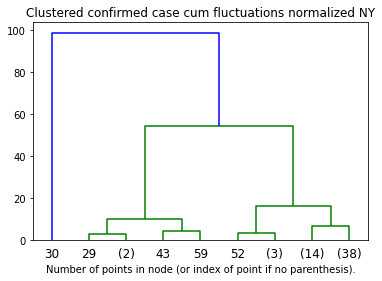

In [100]:
x = confirmedD.to_numpy()
model = AgglomerativeClustering(n_clusters=None, distance_threshold=5)
model = model.fit(x)

def tune_distance_threshold(x):
  threshold = 100

  return threshold, model

plt.title('Clustered confirmed case cum fluctuations normalized NY')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [108]:
print(model.n_clusters_)
print(model.labels_)
all_fips = confirmedD.index
print(all_fips)

6
[5 2 2 2 2 2 2 2 2 2 5 2 2 1 5 2 2 2 5 5 2 2 2 2 2 2 5 5 2 4 3 5 5 5 2 4 5
 2 2 1 2 2 2 0 2 2 5 2 2 2 2 4 1 2 2 1 5 5 2 0 2 2]
Int64Index([36001, 36003, 36005, 36007, 36009, 36011, 36013, 36015, 36017,
            36019, 36021, 36023, 36025, 36027, 36029, 36031, 36033, 36035,
            36037, 36039, 36041, 36043, 36045, 36047, 36049, 36051, 36053,
            36055, 36057, 36059, 36061, 36063, 36065, 36067, 36069, 36071,
            36073, 36075, 36077, 36079, 36081, 36083, 36085, 36087, 36089,
            36091, 36093, 36095, 36097, 36099, 36101, 36103, 36105, 36107,
            36109, 36111, 36113, 36115, 36117, 36119, 36121, 36123],
           dtype='int64')


In [111]:
def cluster_counties(model, counties=all_fips):
  cnt = np.asarray(counties)
  clt = {}
  for L in np.unique(model.labels_):
    mask = np.where(model.labels_ == L, True, False)
    counties_in_cluster = all_fips[mask]
    clt["Cluster {}".format(L)] = counties_in_cluster.map(lambda x: translate_FIPS(x, LU))
  return clt

cluster_counties(model)

{'Cluster 0': Index(['Rockland, New York, US', 'Westchester, New York, US'], dtype='object'),
 'Cluster 1': Index(['Dutchess, New York, US', 'Putnam, New York, US',
        'Sullivan, New York, US', 'Ulster, New York, US'],
       dtype='object'),
 'Cluster 2': Index(['Allegany, New York, US', 'Bronx, New York, US', 'Broome, New York, US',
        'Cattaraugus, New York, US', 'Cayuga, New York, US',
        'Chautauqua, New York, US', 'Chemung, New York, US',
        'Chenango, New York, US', 'Clinton, New York, US',
        'Cortland, New York, US', 'Delaware, New York, US',
        'Essex, New York, US', 'Franklin, New York, US', 'Fulton, New York, US',
        'Hamilton, New York, US', 'Herkimer, New York, US',
        'Jefferson, New York, US', 'Kings, New York, US', 'Lewis, New York, US',
        'Livingston, New York, US', 'Montgomery, New York, US',
        'Ontario, New York, US', 'Oswego, New York, US', 'Otsego, New York, US',
        'Queens, New York, US', 'Rensselaer, New Y